<a href="https://colab.research.google.com/github/PrajwalCP29/Cardiovascular-Risk-Prediction/blob/main/CVD_Risk_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Risk Prediction
### ML & Modern Models: Logistic Regression, RF, XGBoost, LightGBM, CatBoost, TabNet

In [1]:
# Install required libraries (Colab only)
%pip install scikit-learn
%pip install catboost
%pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [3]:
# Load dataset
url = "/content/cardio_train.csv"
df = pd.read_csv(url, sep=';')
df.drop(columns=['id'], inplace=True)
df['age'] = (df['age'] / 365).astype(int)
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# Encode categorical if needed
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [4]:
X = df.drop("cardio", axis=1)
y = df["cardio"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300),
    "CatBoost": CatBoostClassifier(verbose=0),
    "TabNet": TabNetClassifier(verbose=0)
}


▶️ Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000

F1 Score: 0.7024897807506503
ROC AUC: 0.7781100704032883

▶️ Random Forest Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7004
           1       0.71      0.70      0.71      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

F1 Score: 0.7070068271649299
ROC AUC: 0.7678992813548674


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:42:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



▶️ XGBoost Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7004
           1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

F1 Score: 0.7205849767338799
ROC AUC: 0.794954290189156
[LightGBM] [Info] Number of positive: 27983, number of negative: 28017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499696 -> initscore=-0.001214
[LightGBM] [Info] Start training from score -0.001214


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



▶️ LightGBM Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

F1 Score: 0.7233853665754235
ROC AUC: 0.7998730162850666

▶️ MLP (Neural Net) Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7004
           1       0.74      0.70      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

F1 Score: 0.7160041073786123
ROC AUC: 0.7810933774998784

▶️ CatBoost Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7004
           1       0.75      0.70      0.72      699

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)



▶️ TabNet Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      7004
           1       0.70      0.68      0.69      6996

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000

F1 Score: 0.6925533459137756
ROC AUC: 0.7625627898164211


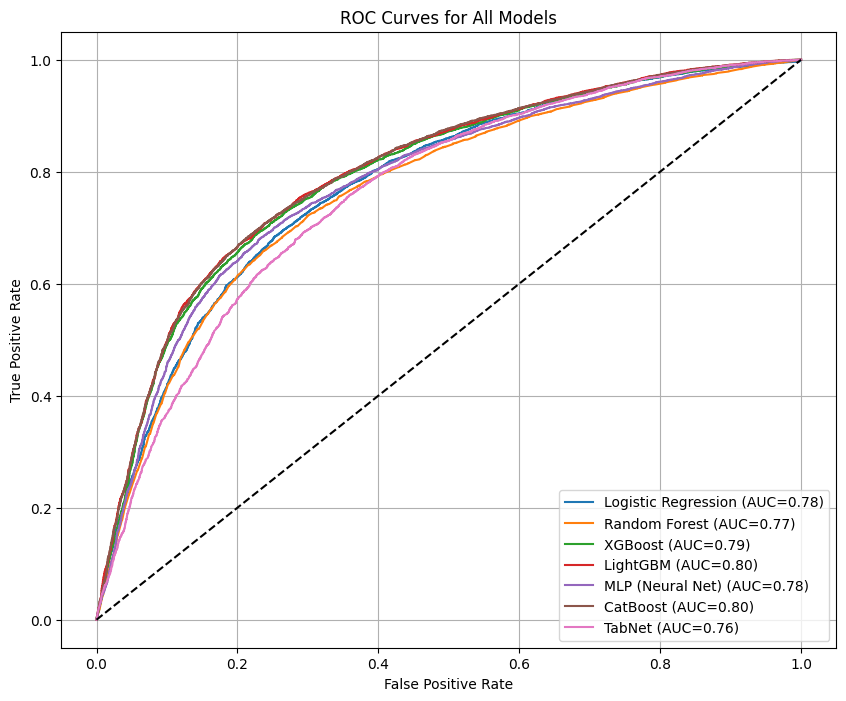

In [5]:
plt.figure(figsize=(10, 8))

def evaluate(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n▶️ {name} Report:")
    print(classification_report(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

for name, model in models.items():
    evaluate(name, model)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.show()

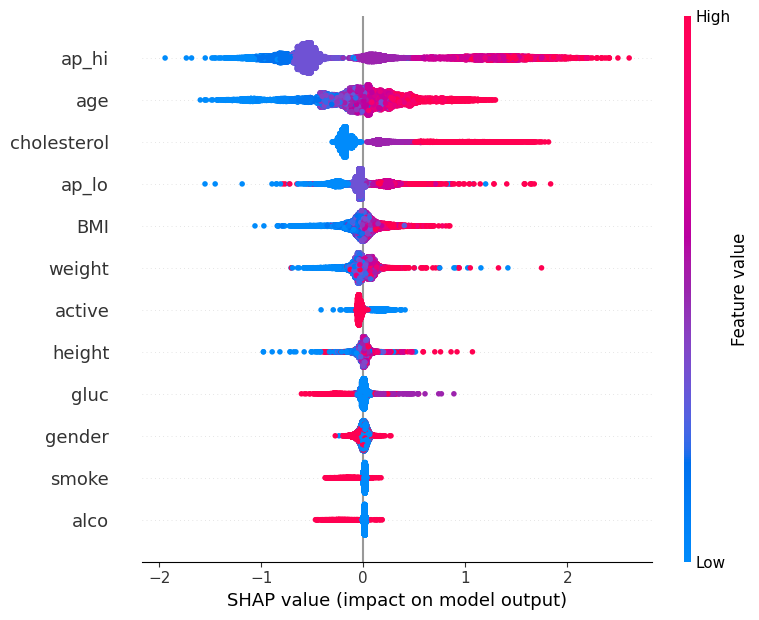

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1 - AUC: 0.8002, F1: 0.7239


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 - AUC: 0.7930, F1: 0.7204


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 - AUC: 0.8012, F1: 0.7228


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4 - AUC: 0.8012, F1: 0.7211


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 - AUC: 0.7949, F1: 0.7231

Average AUC: 0.7980926185698134
Average F1: 0.7222708317589669


In [6]:
# ==========================
# 🔍 SHAP Explainability (CatBoost Example)
# ==========================
import shap

# Fit CatBoost again for SHAP
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

# SHAP values
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

# ==========================
# 🔁 Stratified K-Fold Cross-Validation (Example with XGBoost)
# ==========================
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

auc_scores, f1_scores = [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model.fit(X_train_fold, y_train_fold)
    y_val_pred = xgb_model.predict(X_val_fold)
    y_val_proba = xgb_model.predict_proba(X_val_fold)[:, 1]

    auc = roc_auc_score(y_val_fold, y_val_proba)
    f1 = f1_score(y_val_fold, y_val_pred)
    auc_scores.append(auc)
    f1_scores.append(f1)
    print(f"Fold {fold+1} - AUC: {auc:.4f}, F1: {f1:.4f}")

print("\nAverage AUC:", np.mean(auc_scores))
print("Average F1:", np.mean(f1_scores))